In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [43]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt
sns.set_theme(style='whitegrid', font_scale=1.5)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [45]:
data = pd.read_csv('2022.csv', encoding='CP949')
data.rename(columns={ '가구주_성별코드':'성별', '가구주_교육정도_학력코드':'학력', '가구주_직업대분류코드':'직업', 
                     '가구주_만연령':'연령', '자산_금융자산_저축금액':'저축', '자산_실물자산_부동산금액':'부동산', 
                     '부채_금융부채_담보대출금액':'담보대출', '부채_금융부채_신용대출금액':'신용대출', '경상소득(보완)':'소득', 
                     '지출_소비지출_식료품(외식비포함)':'식료지출', '지출_소비지출_주거비':'주거지출', 
                     '지출_소비지출_교육비(보육료포함)':'교육지출', '지출_비소비지출_세금(보완)':'세금'},inplace=True)
data['학력'] = data['학력'].astype('category')
data['직업'].fillna('기타',inplace=True)

In [49]:
int_columns = ['연령', '가구원수', '저축', '부동산', '담보대출', '신용대출', '소득', '식료지출', '주거지출', '교육지출', '세금']
scaler = StandardScaler()
data[int_columns] = scaler.fit_transform(data[int_columns])

In [50]:
data.head()

,수도권여부,성별,가구원수,학력,직업,연령,저축,부동산,담보대출,신용대출,소득,식료지출,주거지출,교육지출,세금
0,G1,1,-1.120841,1,기타,0.364231,-0.428647,-0.538143,-0.325902,-0.252578,-0.749248,-0.293596,-0.053373,-0.407146,-0.256492
1,G1,1,-1.120841,1,기타,1.021987,-0.302715,-0.261454,-0.325902,-0.252578,-0.670925,-0.655862,-0.481841,-0.407146,-0.239660
2,G1,1,-1.120841,1,기타,1.482415,-0.418201,-0.538143,-0.325902,-0.252578,-0.821298,-0.569608,-0.095517,-0.407146,-0.256492
3,G1,1,-1.120841,1,기타,1.548191,-0.384080,-0.538143,-0.325902,-0.252578,-0.825366,-1.225136,-0.587202,-0.407146,-0.255760
4,G1,1,-1.120841,1,기타,1.613966,0.122483,-0.022039,-0.325902,-0.252578,-0.786883,-0.811118,-0.622322,-0.407146,-0.225755


In [52]:
data_int.head()

,저축,부동산,담보대출,신용대출,소득,식료지출,주거지출,교육지출,세금,cluster_km
0,-0.428647,-0.538143,-0.325902,-0.252578,-0.749248,-0.293596,-0.053373,-0.407146,-0.256492,2
1,-0.302715,-0.261454,-0.325902,-0.252578,-0.670925,-0.655862,-0.481841,-0.407146,-0.239660,2
2,-0.418201,-0.538143,-0.325902,-0.252578,-0.821298,-0.569608,-0.095517,-0.407146,-0.256492,2
3,-0.384080,-0.538143,-0.325902,-0.252578,-0.825366,-1.225136,-0.587202,-0.407146,-0.255760,2
4,0.122483,-0.022039,-0.325902,-0.252578,-0.786883,-0.811118,-0.622322,-0.407146,-0.225755,2


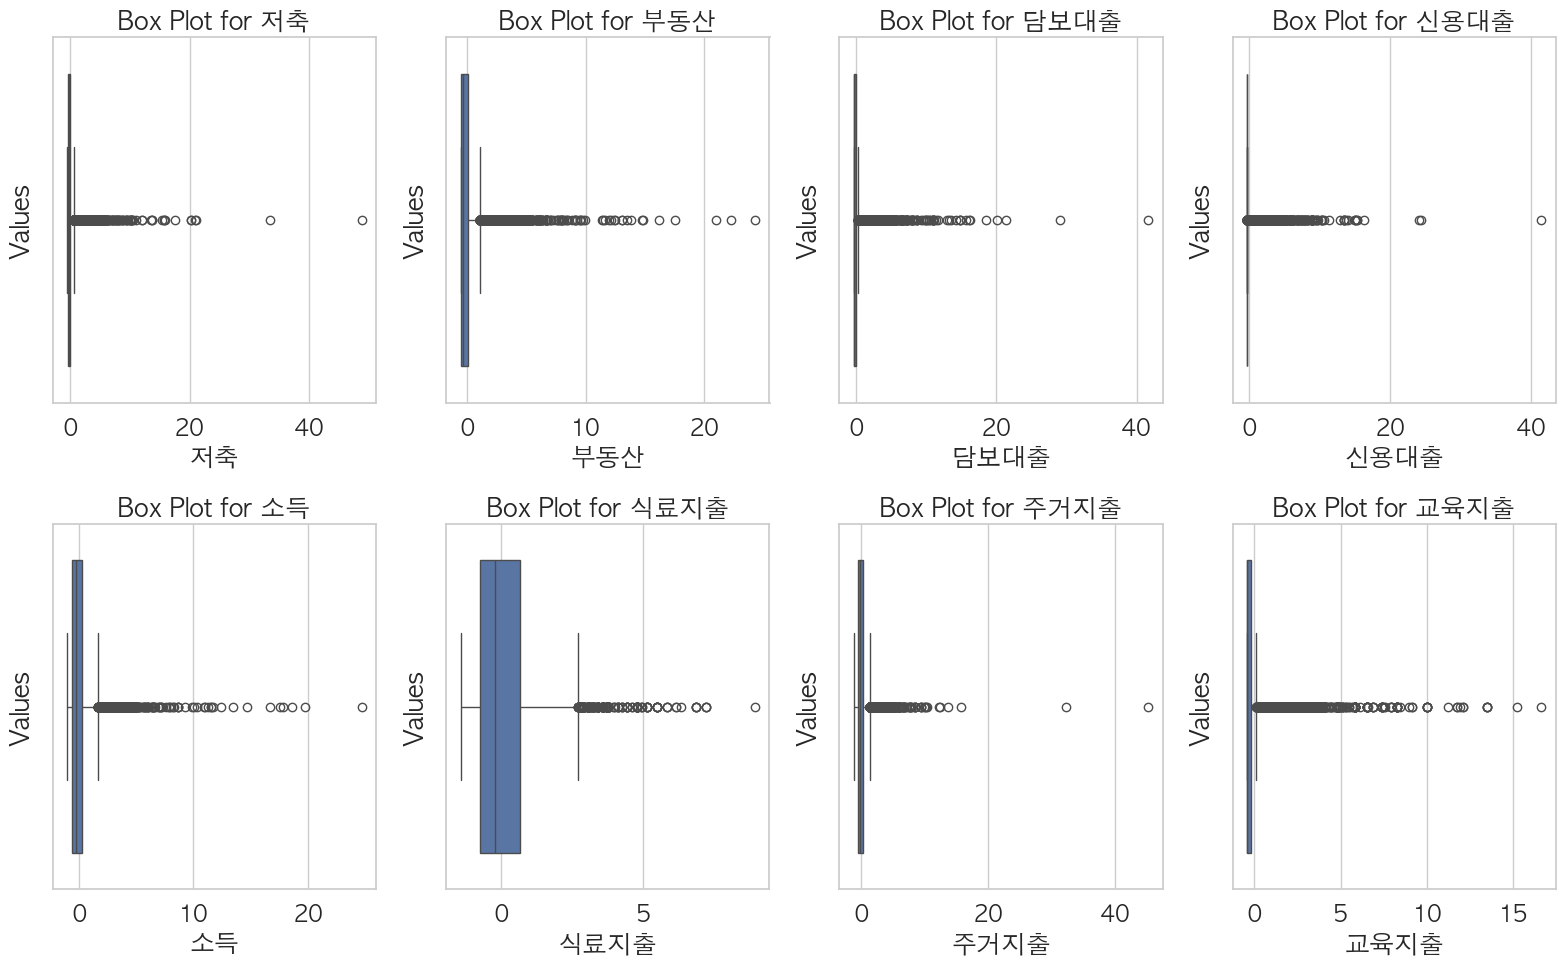

In [9]:
a = data['저축']
b = data['부동산']
c = data['담보대출']
d = data['신용대출']
e = data['소득']
f = data['식료지출']
g = data['주거지출']
h = data['교육지출']
i = data['세금']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
variables = ['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']
data_list = [a,b, c, d, e, f, g, h, i]

for ax, variable, values in zip(axes.flatten(), variables, data_list):
    sns.boxplot(x=values, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Values')
    ax.set_title(f'Box Plot for {variable}')

plt.tight_layout()
plt.savefig('data')

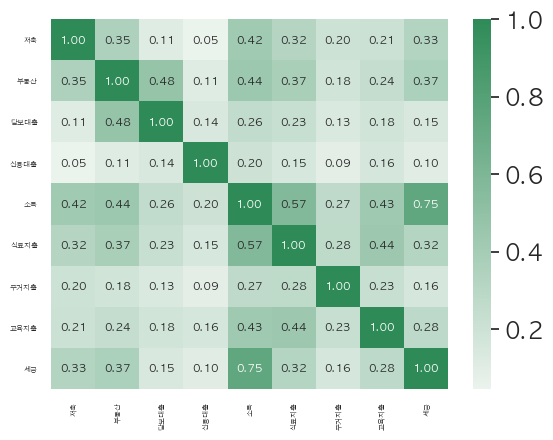

In [53]:
data_int = data[['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']]
cmap = sns.light_palette("seagreen", as_cmap = True)  
heatmap = sns.heatmap(data_int.corr(), annot=True,annot_kws={'size': 8},fmt='.2f', cmap=cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=5)
plt.savefig("data_linear")

<function matplotlib.pyplot.show(close=None, block=None)>

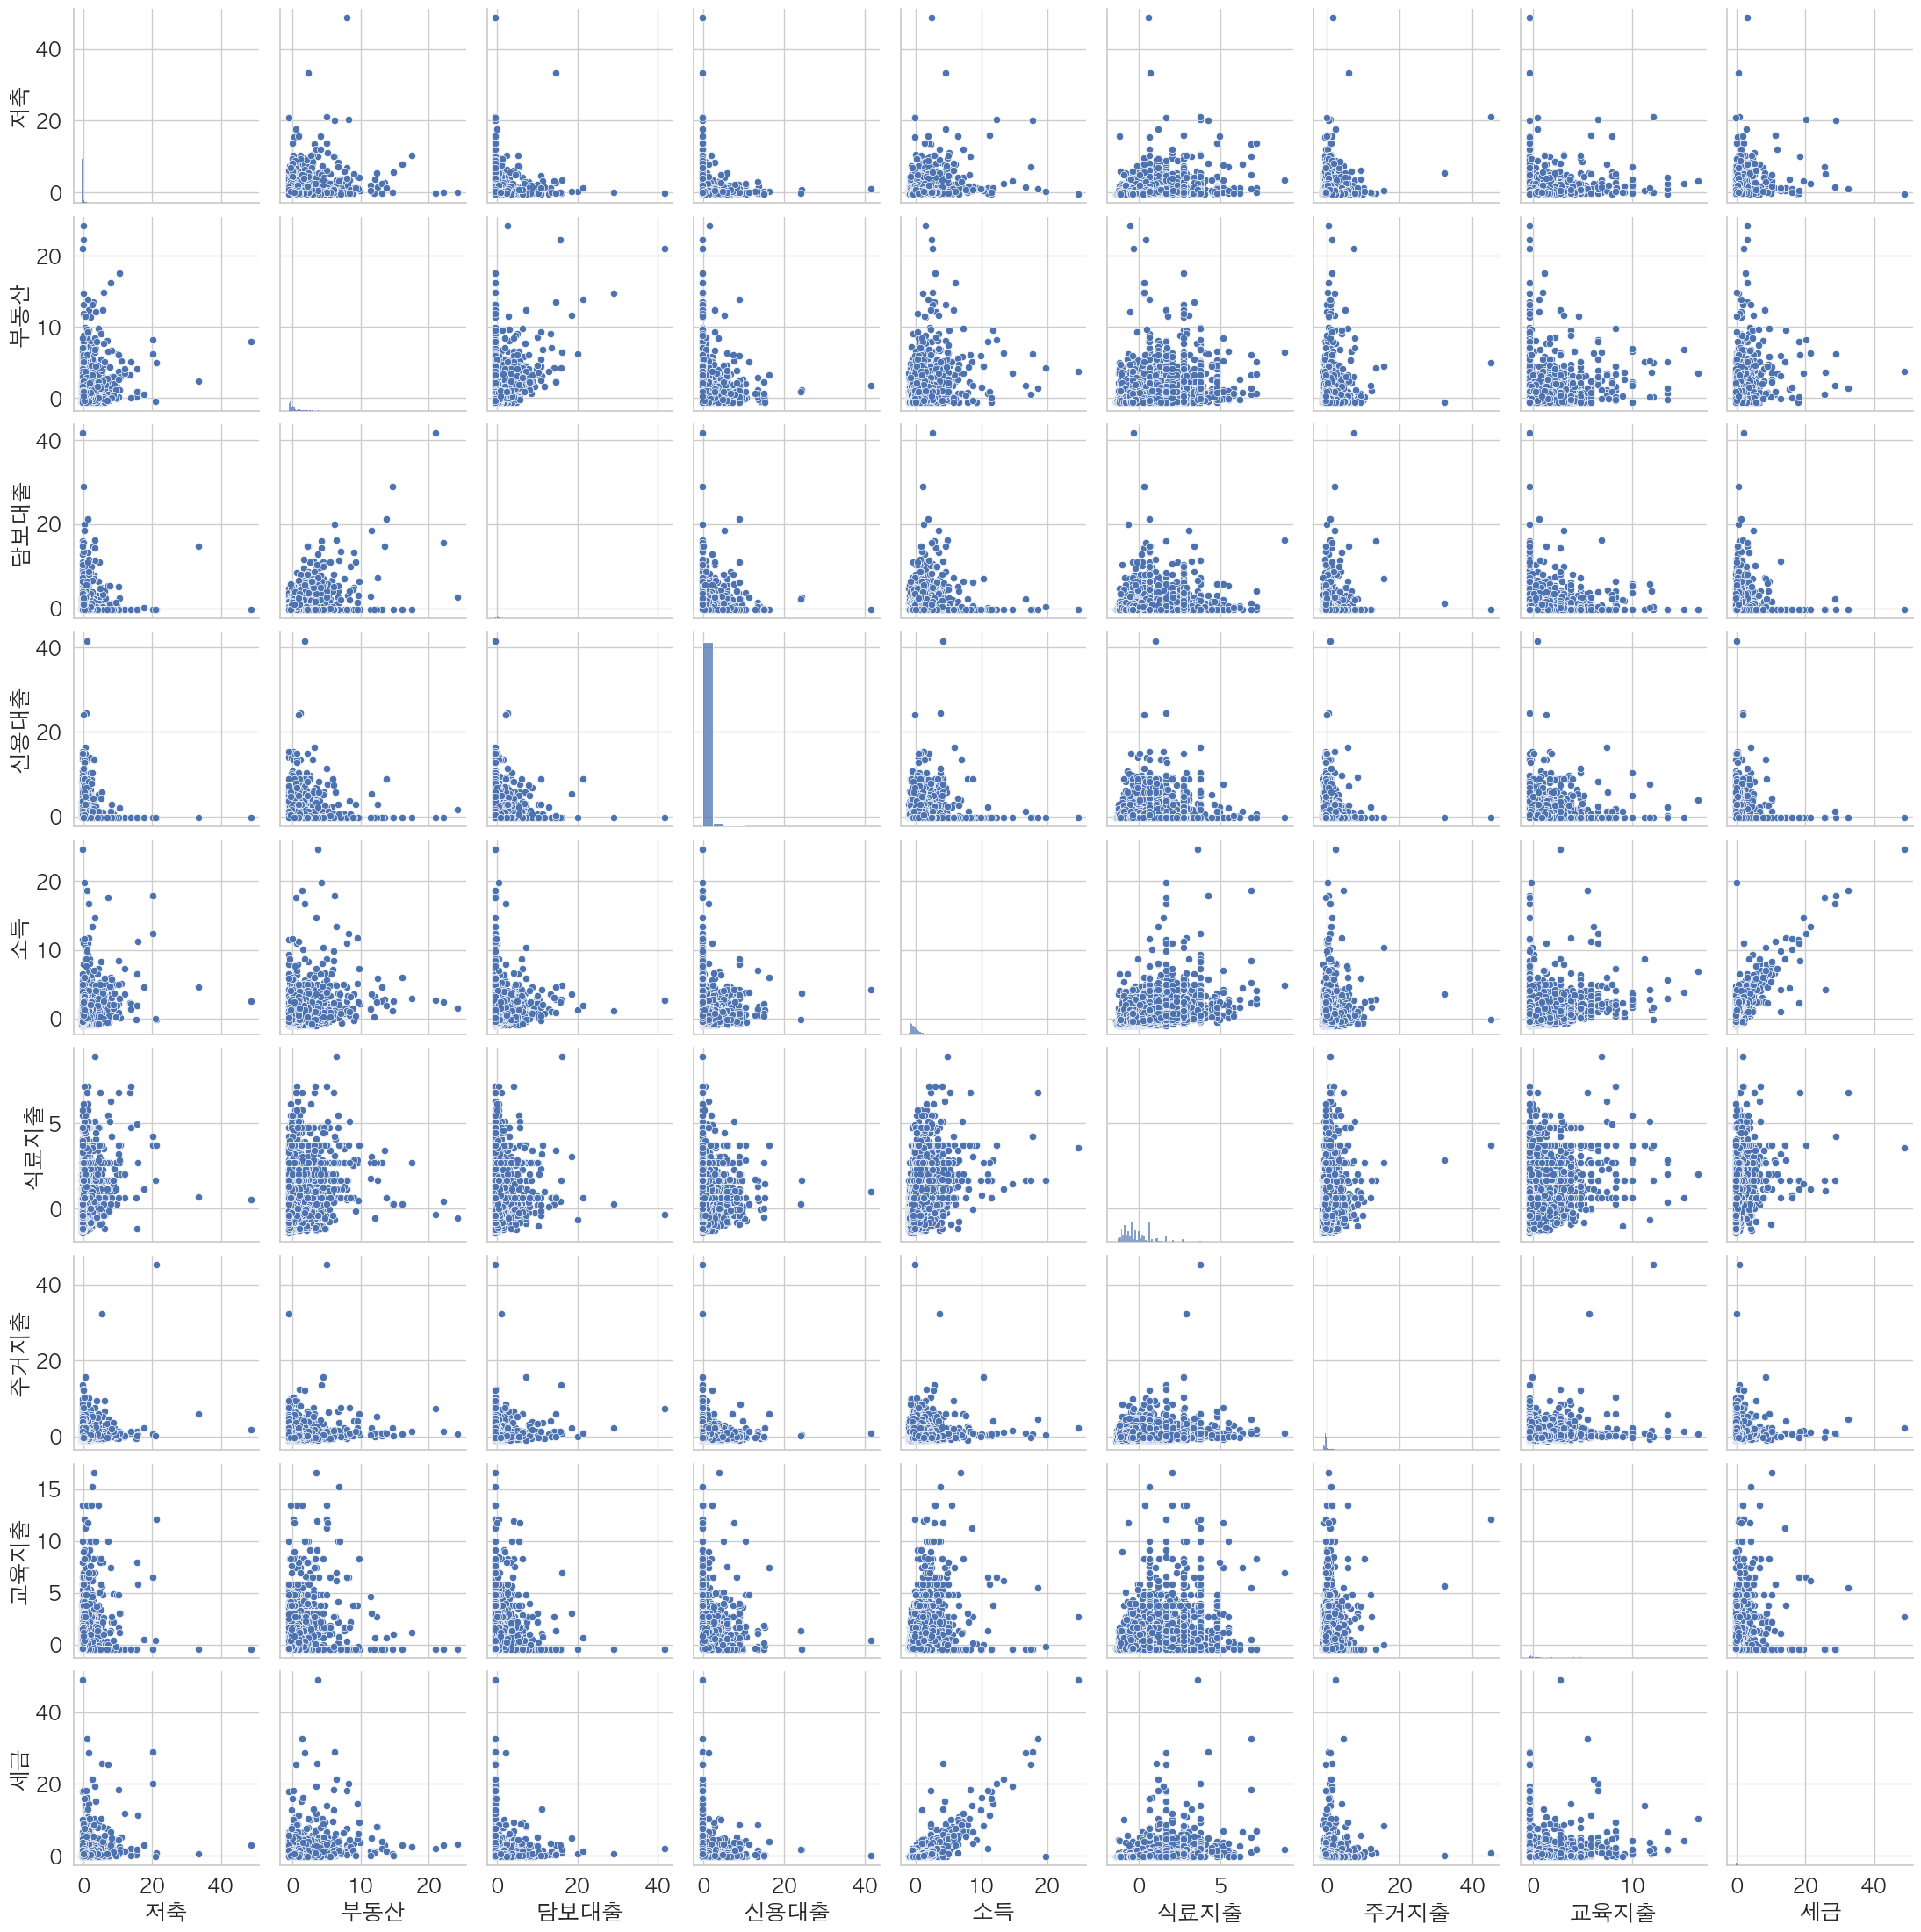

In [14]:
sns.pairplot(data_int)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

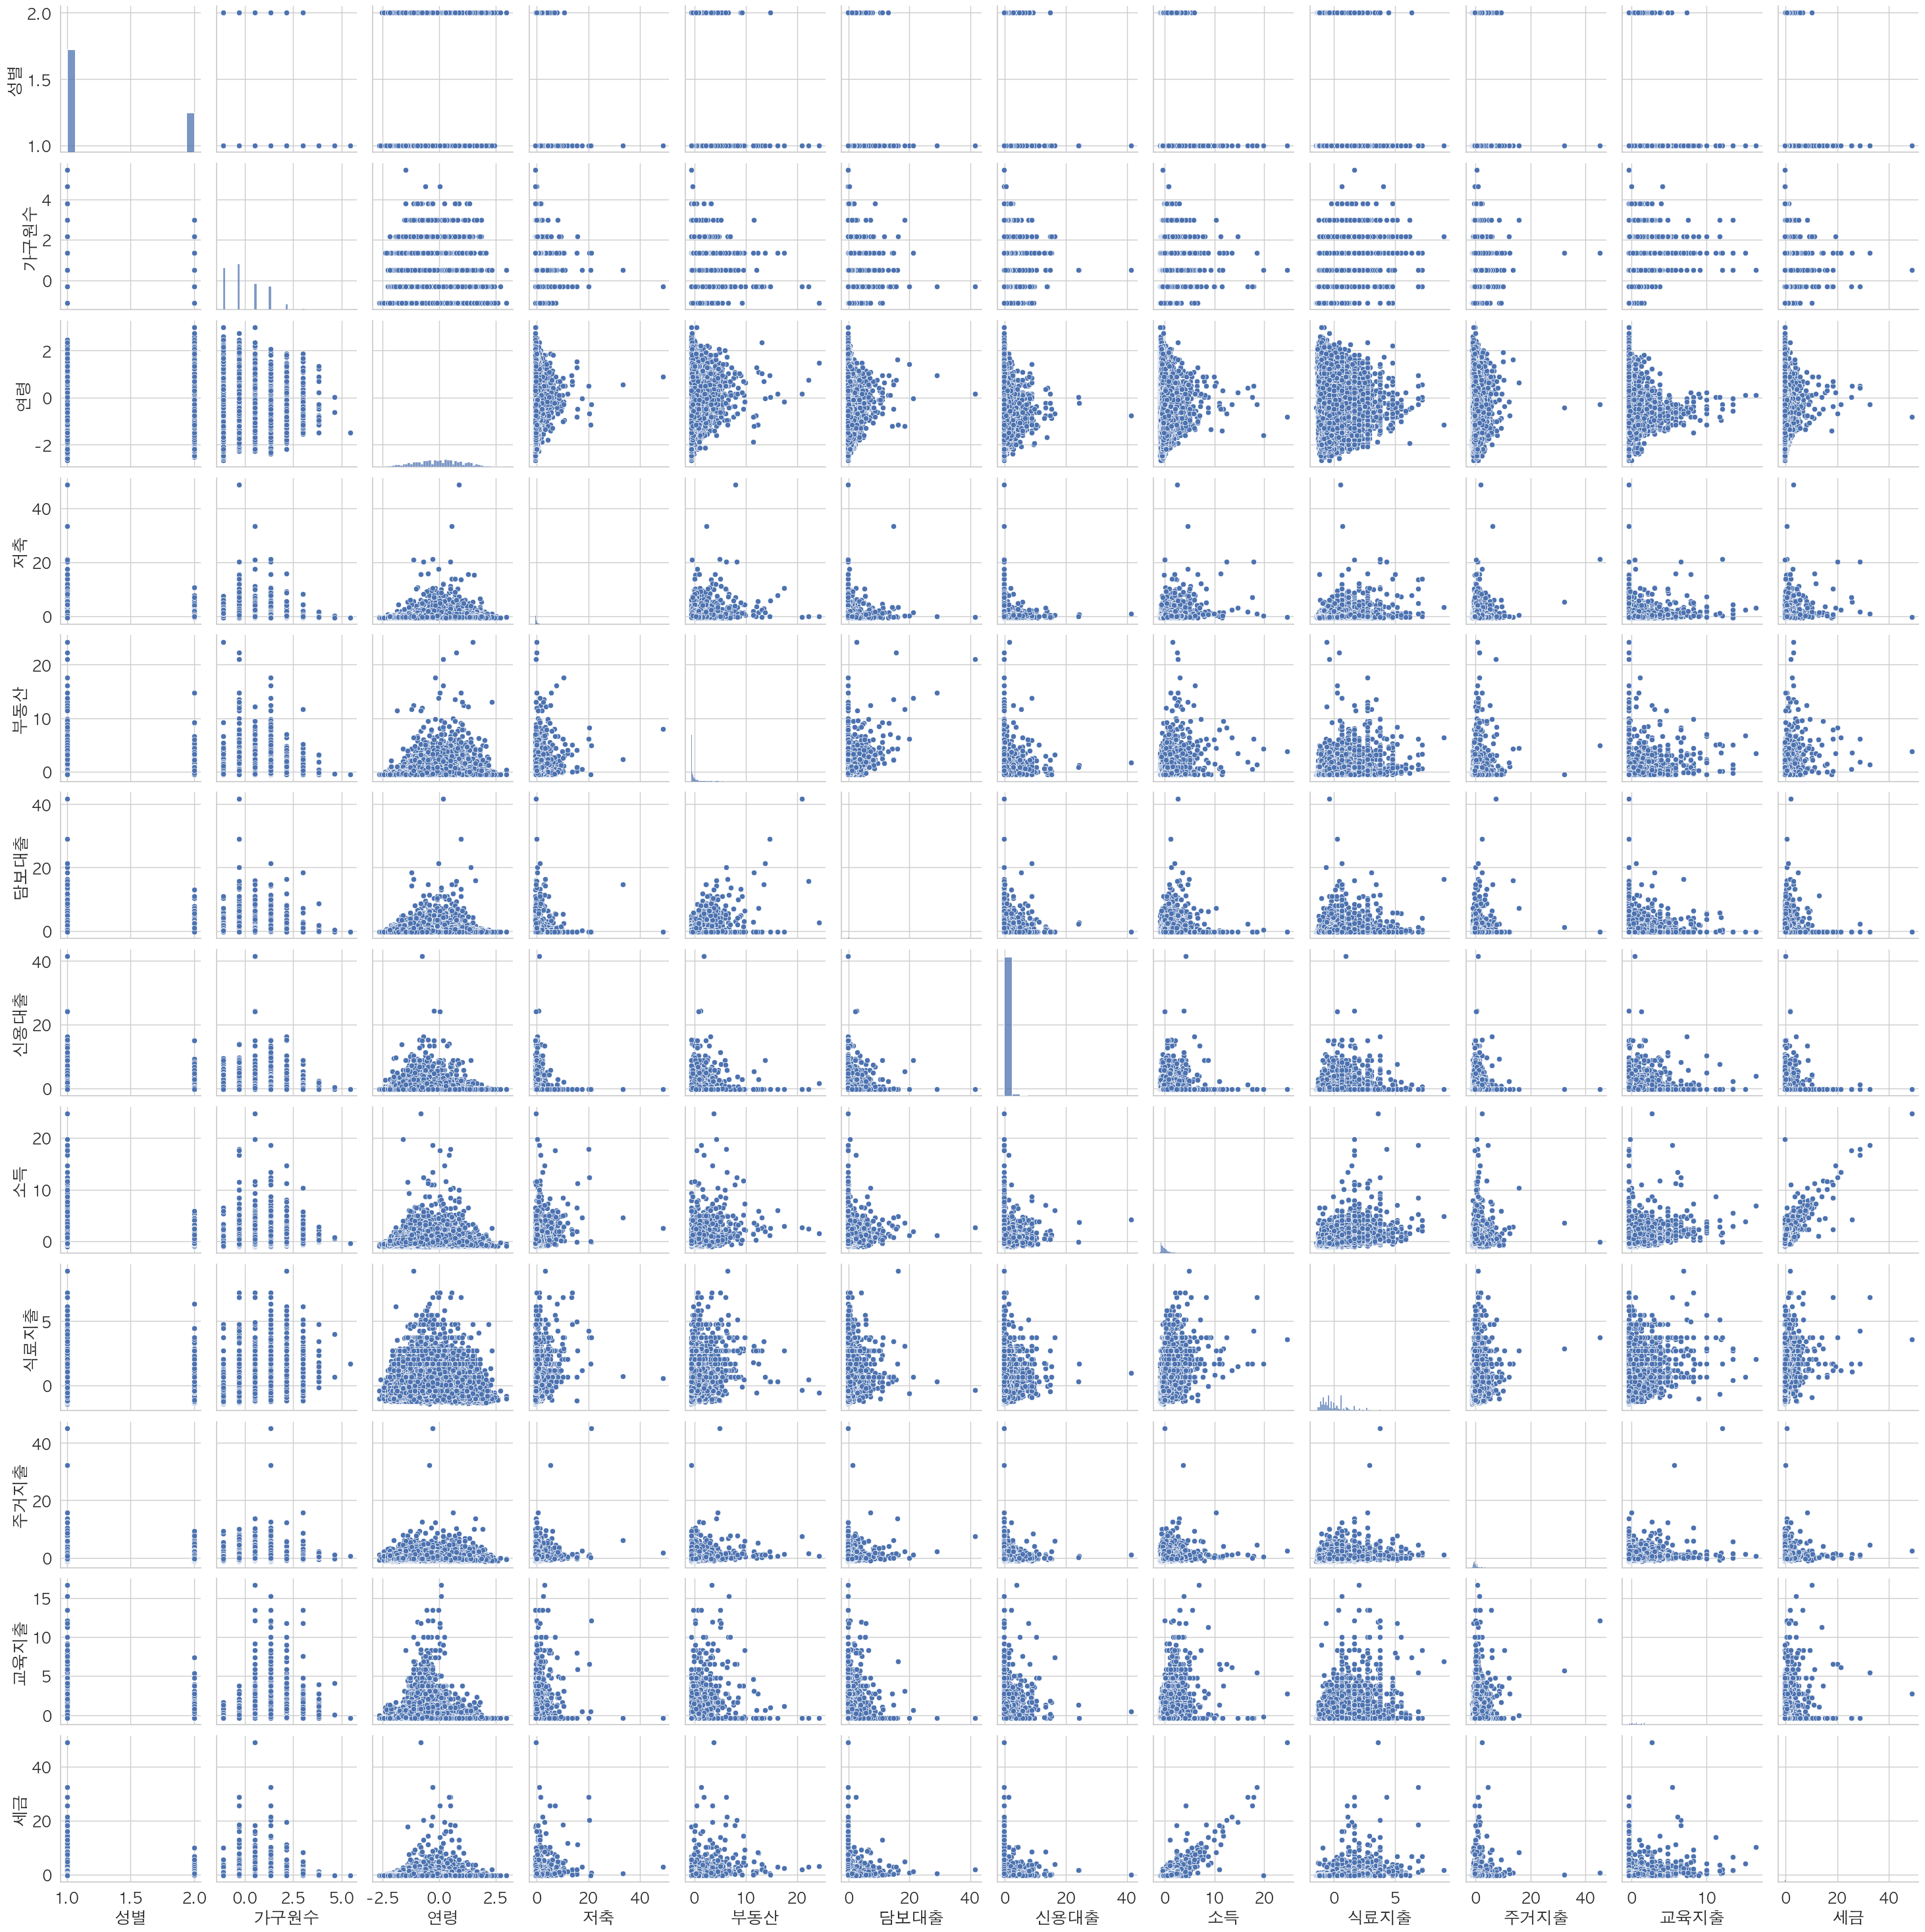

In [15]:
sns.pairplot(data)
plt.show

In [16]:
model1 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data = data).fit()
model2 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 수도권여부', data = data).fit()
model3 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업', data = data).fit()
model4 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 +  C(학력, Treatment(reference=6))', data = data).fit()
model5 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + C(학력, Treatment(reference=6))', data = data).fit()

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4769.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -13203.
No. Observations:               17954   AIC:                         2.643e+04
Df Residuals:                   17942   BIC:                         2.652e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1177      0.013      9.414      0.000       0.093       0.142
성별            -0.0919      0.009     -9.873      0.000      -0.110      -0.074
가구원수           0.1869      0.005     35.428      0.000       0.177       0.197
연령            -0.0620      0.004    -14.791      0.000      -0.070      -0.054
저축             0.1067      0.004     25.144      0.000       0.098       0.115
부동산            0.0537      0.005     10.870      0.000       0.044       0.063
담보대출           0.0398      0.004      9.074      0.000       0.031       0.048
신용대출           0.0515      0.004     13.293      0.000       0.044       0.059
식료지출           0.1553      0.005     29.744      0.000       0.145       0.166
주거지출           0.0296      0.004      7.370      0.000       0.022       0.037
교육지출           0.0212      0.005      4.576      0.000       0.012       0.030
세금             0.5805      0.004    135.349      0.000       0.572       0.589
==============================================================================
Omnibus:                    15998.656   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17656785.551
Skew:                           3.120   Prob(JB):                         0.00
Kurtosis:                     156.505   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4376.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -13196.
No. Observations:               17954   AIC:                         2.642e+04
Df Residuals:                   17941   BIC:                         2.652e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0941      0.014      6.776      0.000       0.067       0.121
수도권여부[T.G2]     0.0323      0.008      3.877      0.000       0.016       0.049
성별             -0.0907      0.009     -9.733      0.000      -0.109      -0.072
가구원수            0.1857      0.005     35.138      0.000       0.175       0.196
연령             -0.0634      0.004    -15.077      0.000      -0.072      -0.055
저축              0.1059      0.004     24.914      0.000       0.098       0.114
부동산             0.0566      0.005     11.325      0.000       0.047       0.066
담보대출            0.0392      0.004      8.928      0.000       0.031       0.048
신용대출            0.0515      0.004     13.290      0.000       0.044       0.059
식료지출            0.1571      0.005     29.984      0.000       0.147       0.167
주거지출            0.0306      0.004      7.612      0.000       0.023       0.038
교육지출            0.0212      0.005      4.571      0.000       0.012       0.030
세금              0.5805      0.004    135.408      0.000       0.572       0.589
==============================================================================
Omnibus:                    15973.515   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17574449.687
Skew:                           3.112   Prob(JB):                         0.00
Kurtosis:                     156.147   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     2635.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -12840.
No. Observations:               17954   AIC:                         2.572e+04
Df Residuals:                   17932   BIC:                         2.589e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3003      0.031      9.812      0.000       0.240       0.360
직업[T.2]       -0.0191      0.030     -0.635      0.526      -0.078       0.040
직업[T.3]       -0.0508      0.030     -1.677      0.094      -0.110       0.009
직업[T.4]       -0.1928      0.032     -6.029      0.000      -0.256      -0.130
직업[T.5]       -0.1567      0.032     -4.932      0.000      -0.219      -0.094
직업[T.6]       -0.2104      0.032     -6.509      0.000      -0.274      -0.147
직업[T.7]       -0.1712      0.031     -5.487      0.000      -0.232      -0.110
직업[T.8]       -0.1246      0.031     -4.070      0.000      -0.185      -0.065
직업[T.9]       -0.2673      0.031     -8.668      0.000      -0.328      -0.207
직업[T.A]        0.0839      0.107      0.784      0.433      -0.126       0.294
직업[T.기타]      -0.3894      0.030    -12.902      0.000      -0.449      -0.330
성별            -0.0739      0.009     -7.802      0.000      -0.093      -0.055
가구원수           0.1796      0.005     34.457      0.000       0.169       0.190
연령             0.0033      0.005      0.663      0.507      -0.006       0.013
저축             0.1045      0.004     25.062      0.000       0.096       0.113
부동산            0.0528      0.005     10.861      0.000       0.043       0.062
담보대출           0.0344      0.004      7.974      0.000       0.026       0.043
신용대출           0.0492      0.004     12.930      0.000       0.042       0.057
식료지출           0.1402      0.005     27.002      0.000       0.130       0.150
주거지출           0.0279      0.004      7.083      0.000       0.020       0.036
교육지출           0.0118      0.005      2.569      0.010       0.003       0.021
세금             0.5715      0.004    134.995      0.000       0.563       0.580
==============================================================================
Omnibus:                    16551.966   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20031650.419
Skew:                           3.309   Prob(JB):                         0.00
Kurtosis:                     166.504   Cond. No.                         55.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2961.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -13096.
No. Observations:               17954   AIC:                         2.623e+04
Df Residuals:                   17935   BIC:                         2.638e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.1565      0.014     10.947      0.000       0.128       0.184
C(학력, Treatment(reference=6))[T.1]    -0.1597      0.022     -7.161      0.000      -0.203      -0.116
C(학력, Treatment(reference=6))[T.2]    -0.1499      0.016     -9.357      0.000      -0.181      -0.119
C(학력, Treatment(reference=6))[T.3]    -0.0993      0.015     -6.485      0.000      -0.129      -0.069
C(학력, Treatment(reference=6))[T.4]    -0.0734      0.011     -6.691      0.000      -0.095      -0.052
C(학력, Treatment(reference=6))[T.5]    -0.0553      0.014     -4.033      0.000      -0.082      -0.028
C(학력, Treatment(reference=6))[T.7]     0.1001      0.020      4.943      0.000       0.060       0.140
C(학력, Treatment(reference=6))[T.8]     0.2319      0.033      7.019      0.000       0.167       0.297
성별                                    -0.0751      0.010     -7.872      0.000      -0.094      -0.056
가구원수                                   0.1895      0.005     35.991      0.000       0.179       0.200
연령                                    -0.0345      0.005     -6.736      0.000      -0.045      -0.024
저축                                     0.1013      0.004     23.897      0.000       0.093       0.110
부동산                                    0.0428      0.005      8.588      0.000       0.033       0.053
담보대출                                   0.0424      0.004      9.700      0.000       0.034       0.051
신용대출                                   0.0500      0.004     12.964      0.000       0.042       0.058
식료지출                                   0.1453      0.005     27.713      0.000       0.135       0.156
주거지출                                   0.0256      0.004      6.383      0.000       0.018       0.033
교육지출                                   0.0152      0.005      3.248      0.001       0.006       0.024
세금                                     0.5775      0.004    134.989      0.000       0.569       0.586
==============================================================================
Omnibus:                    16408.202   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18834217.991
Skew:                           3.267   Prob(JB):                         0.00
Kurtosis:                     161.537   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1928.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -12766.
No. Observations:               17954   AIC:                         2.559e+04
Df Residuals:                   17924   BIC:                         2.583e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.2900      0.031      9.233      0.000       0.228       0.352
직업[T.2]                               -0.0508      0.030     -1.684      0.092      -0.110       0.008
직업[T.3]                               -0.0539      0.030     -1.785      0.074      -0.113       0.005
직업[T.4]                               -0.1809      0.032     -5.659      0.000      -0.244      -0.118
직업[T.5]                               -0.1432      0.032     -4.517      0.000      -0.205      -0.081
직업[T.6]                               -0.1882      0.032     -5.796      0.000      -0.252      -0.125
직업[T.7]                               -0.1475      0.031     -4.720      0.000      -0.209      -0.086
직업[T.8]                               -0.1013      0.031     -3.296      0.001      -0.162      -0.041
직업[T.9]                               -0.2429      0.031     -7.857      0.000      -0.303      -0.182
직업[T.A]                                0.0764      0.107      0.716      0.474      -0.133       0.285
직업[T.기타]                              -0.3750      0.030    -12.449      0.000      -0.434      -0.316
수도권여부[T.G2]                            0.0301      0.008      3.654      0.000       0.014       0.046
C(학력, Treatment(reference=6))[T.1]    -0.1295      0.022     -5.823      0.000      -0.173      -0.086
C(학력, Treatment(reference=6))[T.2]    -0.1246      0.016     -7.656      0.000      -0.157      -0.093
C(학력, Treatment(reference=6))[T.3]    -0.0759      0.016     -4.857      0.000      -0.106      -0.045
C(학력, Treatment(reference=6))[T.4]    -0.0526      0.011     -4.590      0.000      -0.075      -0.030
C(학력, Treatment(reference=6))[T.5]    -0.0438      0.014     -3.205      0.001      -0.071      -0.017
C(학력, Treatment(reference=6))[T.7]     0.0905      0.020      4.495      0.000       0.051       0.130
C(학력, Treatment(reference=6))[T.8]     0.1953      0.033      5.916      0.000       0.131       0.260
성별                                    -0.0539      0.010     -5.515      0.000      -0.073      -0.035
가구원수                                   0.1791      0.005     34.352      0.000       0.169       0.189
연령                                     0.0195      0.006      3.499      0.000       0.009       0.030
저축                                     0.1000      0.004     23.964      0.000       0.092       0.108
부동산                                    0.0477      0.005      9.618      0.000       0.038       0.057
담보대출                                   0.0360      0.004      8.366      0.000       0.028       0.044
신용대출                                   0.0483      0.004     12.728      0.000       0.041       0.056
식료지출                                   0.1357      0.005     25.997      0.000       0.125      

<Axes: >

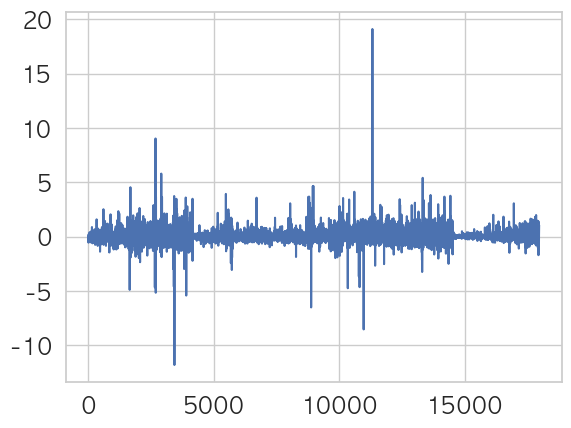

In [22]:
model1.resid.plot(label = "full model")


In [23]:

import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 11.000459465120468
VIF of 성별 : 1.230435081853549
VIF of 가구원수 : 1.960069401430465
VIF of 연령 : 1.2355351306688886
VIF of 저축 : 1.2688584038447048
VIF of 부동산 : 1.7210745987642833
VIF of 담보대출 : 1.3565938351833302
VIF of 신용대출 : 1.0586885174629068
VIF of 식료지출 : 1.9189512527937467
VIF of 주거지출 : 1.1347397094096086
VIF of 교육지출 : 1.5124169592613588
VIF of 세금 : 1.2949132855170975


In [24]:
import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + 학력', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 106.3837097189233
VIF of 직업[T.2] : 6.708083839942073
VIF of 직업[T.3] : 6.201924108007746
VIF of 직업[T.4] : 4.683874495612615
VIF of 직업[T.5] : 4.4820229663325035
VIF of 직업[T.6] : 5.092073469328004
VIF of 직업[T.7] : 5.344201670612241
VIF of 직업[T.8] : 6.399369250618629
VIF of 직업[T.9] : 7.37586727748963
VIF of 직업[T.A] : 1.0750654729051399
VIF of 직업[T.기타] : 12.988670848172294
VIF of 수도권여부[T.G2] : 1.0915565167414603
VIF of 학력[T.2] : 3.3234404980005183
VIF of 학력[T.3] : 3.2250868703709705
VIF of 학력[T.4] : 6.403677786459711
VIF of 학력[T.5] : 4.043006267934295
VIF of 학력[T.6] : 6.487458550945975
VIF of 학력[T.7] : 2.311125655897616
VIF of 학력[T.8] : 1.5393276397240663
VIF of 성별 : 1.4226738111024482
VIF of 가구원수 : 2.007487169389681
VIF of 연령 : 2.285361422755931
VIF of 저축 : 1.2863636333241804
VIF of 부동산 : 1.8127390548689721
VIF of 담보대출 : 1.3688080220473429
VIF of 신용대출 : 1.0646442444379207
VIF of 식료지출 : 2.0104282178943285
VIF of 주거지출 : 1.150456886677737
VIF of 교육지출 : 1.5662135195840556
VI

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4).fit(data_int)
data_int['cluster_km']=km.labels_
data_int['cluster_km']=data_int['cluster_km'].astype('category')

data_int.cluster_km.value_counts()

cluster_km
2    12032
1     5208
0      683
3       31
Name: count, dtype: int64

In [34]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

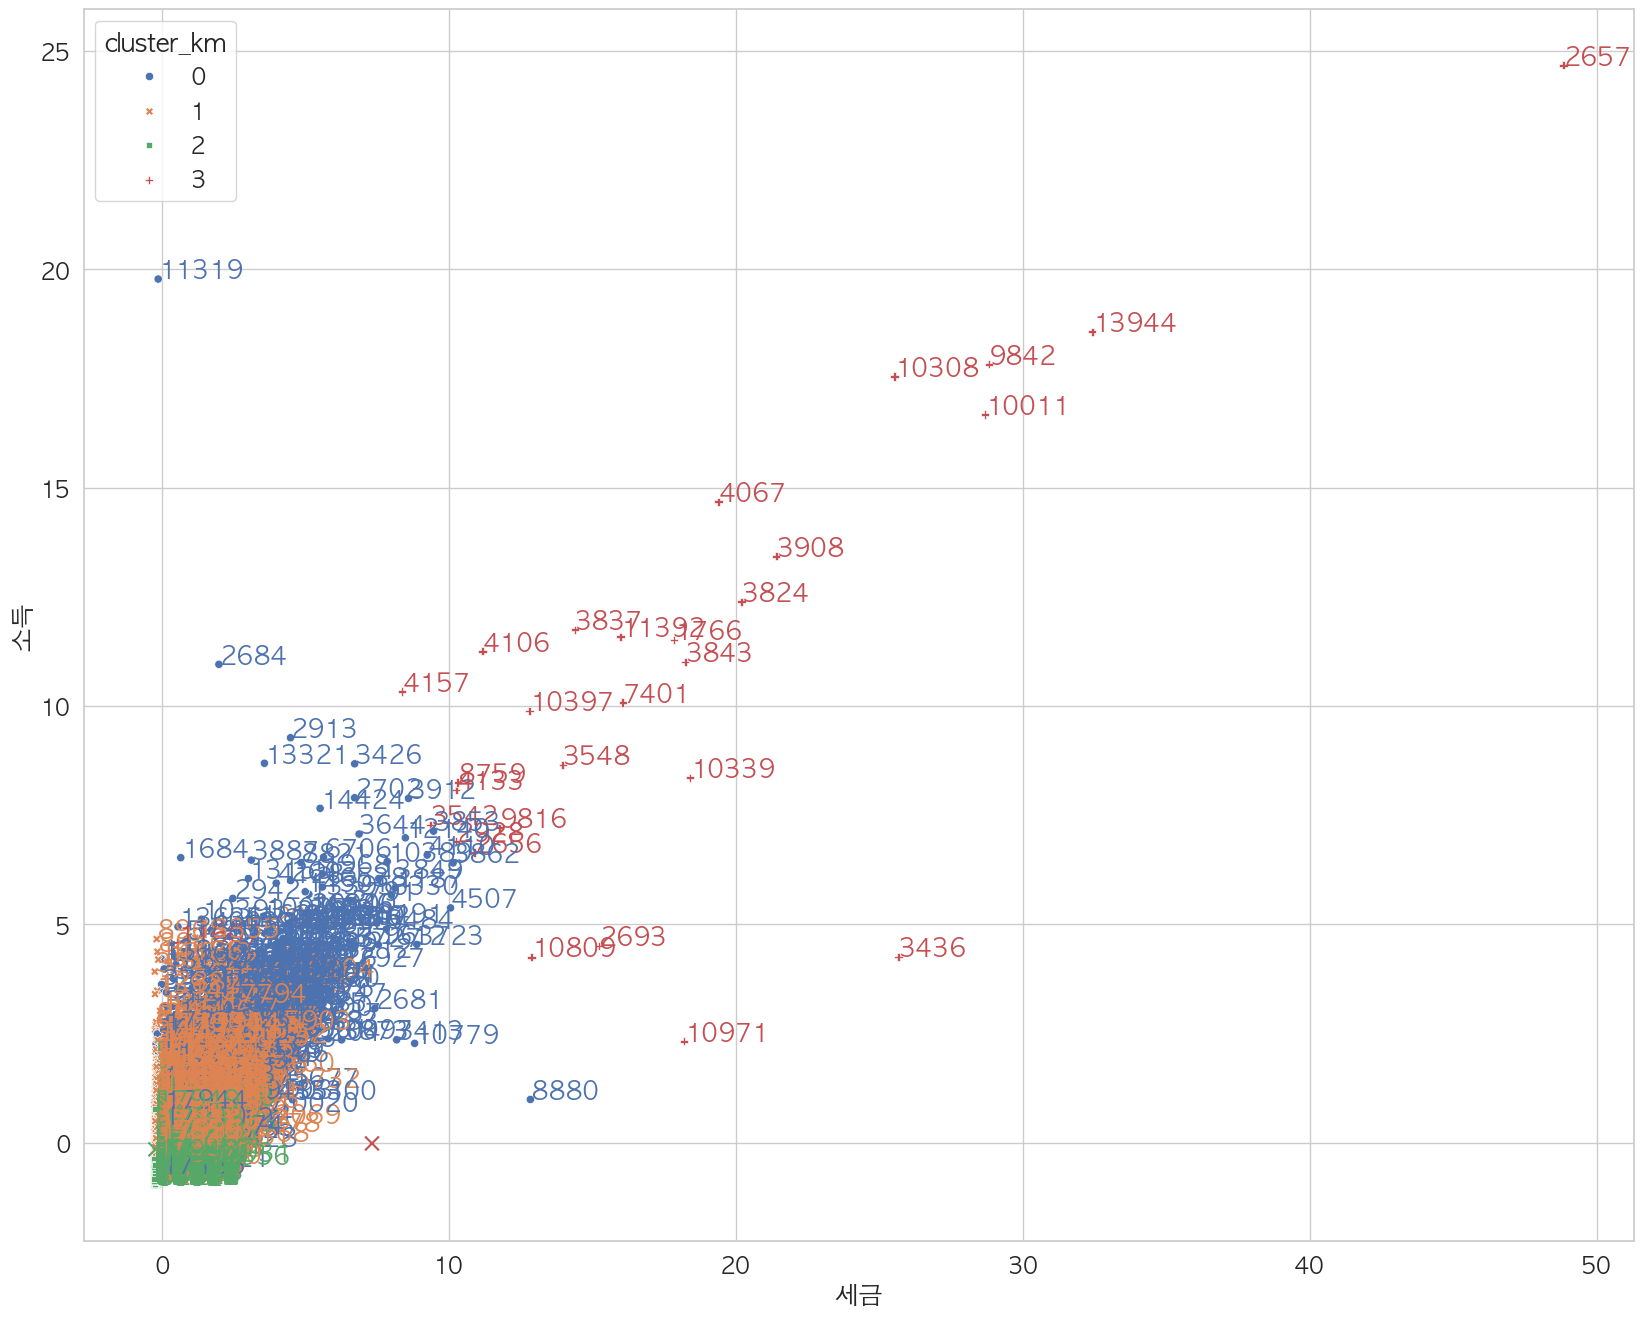

In [38]:
plt.figure(figsize=(20,16))
sns.scatterplot(x="세금", y="소득", hue="cluster_km", style="cluster_km", data=data_int)
for i in range(data_int.shape[0]):
    plt.text(x=data_int.세금[i]+0.01, 
            y=data_int.소득[i]+0.01,
            s=data_int.index[i],
            color=sns.color_palette()[data_int.cluster_km[i]])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,3], marker="x", s=100,
            color=sns.color_palette()[:4])
plt.show()

In [28]:
wss=[]
for k in np.arange(1,20):
    km_k = KMeans(n_clusters=k,n_init=10).fit(data_int)
    wss.append(km_k.inertia_)

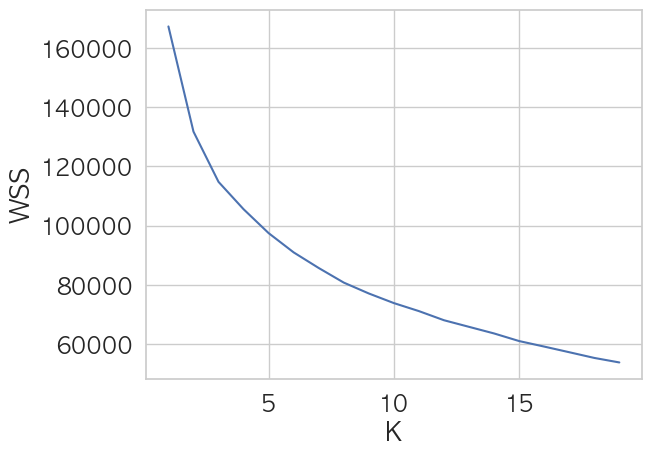

In [29]:
plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()